In [135]:
import os
import pandas as pd

directory = r'Datos\\Series-csv'

# !!!!!!!!!!!!!! Tenia un codigo muy feo y le pedi a chat ayuda para que se viera mas bonito !!!!!!!!!!!!!!

# Dictionary to store dataframes
dataframes = {}

# Iterate over all files in the directory
for i, filename in enumerate(os.listdir(directory), start=1):
    file_path = os.path.join(directory, filename)
    dataframes[f'df{i}'] = pd.read_csv(file_path)

# Extract specific dataframes
dfs = [dataframes[f'df{i}'] for i in range(1, 13)] # Hay 12 archivos

# Function to clean dataframe
def clean_dataframe(df):
    df = df.drop([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16]).reset_index(drop=True) # Solo usan la fila 8, borro hasta que hay datos y reseteo el index
    df.columns = df.iloc[0] # La primera fila es el nombre de las columnas
    return df.drop([0]).reset_index(drop=True) # Borro la primera fila y reseteo el index

# Clean all dataframes
dfs = [clean_dataframe(df) for df in dfs]

# Assign cleaned dataframes back to individual variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = dfs


C:\Users\herie\AppData\Local\Temp\ipykernel_26024\1856070868.py:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,81,82,83,84,93,94,95,96,97,98,99,100,101,102,103,104,109,110,111,112,121,122,123,124,157,158,159,160,161,162,163,164,165,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[f'df{i}'] = pd.read_csv(file_path)


In [136]:
# Assign cleaned dataframes back to individual variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = dfs

## **Vamos a hacer que todos tengan el mismo Índice, que va a ser el primer día del mes desde 2010 y 2020**

### DF1

In [137]:
df1.head()

,Título,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días,"Tasas de interés interbancarias Por ciento anual, TIIP a 28 días"
0,2006-01-02 00:00:00,8.27,8.57,N/E,N/E,N/E
1,2006-01-03 00:00:00,8.28,8.565,N/E,N/E,N/E
2,2006-01-04 00:00:00,8.28,8.55,N/E,N/E,N/E
3,2006-01-05 00:00:00,8.28,8.565,8.28,N/E,N/E
4,2006-01-06 00:00:00,8.28,8.575,N/E,N/E,N/E


In [138]:
# solo queremos de 2010 en adelante

df1 = df1[df1["Título"] >= "2009-12-30"]
df1 = df1.reset_index(drop=True) # Se salta del 2009-12-30 al 2010-01-04

df1 = df1[df1["Título"] >= "2010-01-01"]
df1 = df1.reset_index(drop=True) # Tenemos datos desde el 2010-01-04
df1.head()



,Título,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días,"Tasas de interés interbancarias Por ciento anual, TIIP a 28 días"
0,2010-01-04 00:00:00,4.55,4.9231,5.1121,N/E,N/E
1,2010-01-05 00:00:00,4.56,4.91,5.075,N/E,N/E
2,2010-01-06 00:00:00,4.55,4.895,5.065,N/E,N/E
3,2010-01-07 00:00:00,4.55,4.913,5.0918,N/E,N/E
4,2010-01-08 00:00:00,4.56,4.925,5.085,N/E,N/E


In [139]:
# todos los valores de la 6 son N/E entonces la borro
df1 = df1.drop(columns=["Tasas de interés interbancarias Por ciento anual, TIIP a 28 días"])
df1.head()

,Título,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días
0,2010-01-04 00:00:00,4.55,4.9231,5.1121,N/E
1,2010-01-05 00:00:00,4.56,4.91,5.075,N/E
2,2010-01-06 00:00:00,4.55,4.895,5.065,N/E
3,2010-01-07 00:00:00,4.55,4.913,5.0918,N/E
4,2010-01-08 00:00:00,4.56,4.925,5.085,N/E


In [140]:
# hacemos que la fecha sea el index
df1 = df1.set_index("Título")


# le cambiamos el nombre de Título a Fecha
df1.index.names = ["Fecha"]
df1.tail()

,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días
Fecha,,,,
2025-02-18 00:00:00,9.49,9.7638,9.8435,9.96
2025-02-19 00:00:00,9.49,9.7739,9.8537,9.9705
2025-02-20 00:00:00,9.48,9.7638,9.8435,9.96
2025-02-21 00:00:00,9.51,9.7638,9.8435,9.96
2025-02-24 00:00:00,N/E,9.7538,9.8332,9.9495


In [141]:
df1.head()  

,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días
Fecha,,,,
2010-01-04 00:00:00,4.55,4.9231,5.1121,N/E
2010-01-05 00:00:00,4.56,4.91,5.075,N/E
2010-01-06 00:00:00,4.55,4.895,5.065,N/E
2010-01-07 00:00:00,4.55,4.913,5.0918,N/E
2010-01-08 00:00:00,4.56,4.925,5.085,N/E


In [142]:
# si dice N/E lo vamos a droppear, solo queremos una fecha al mes y queremos que tenga todos los datos

# droppeamos las filas que tienen N/E
df1 = df1.replace('N/E', pd.NA).dropna() # Reemplazamos N/E por NA y luego borramos las filas que tengan NA
df1.head(30) 

,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días
Fecha,,,,
2011-04-07 00:00:00,4.51,4.8275,4.8616,4.975
2011-04-14 00:00:00,4.51,4.86,4.88,5.0052
2011-04-20 00:00:00,4.52,4.865,4.905,4.96
2011-04-28 00:00:00,4.5,4.8699,4.91,4.995
2011-05-05 00:00:00,4.5,4.845,4.865,4.97
2011-05-12 00:00:00,4.48,4.85,4.895,4.965
2011-05-19 00:00:00,4.49,4.8465,4.885,4.94
2011-05-26 00:00:00,4.34,4.8568,4.9075,4.9458
2011-06-02 00:00:00,4.45,4.8699,4.915,4.965


In [ ]:
# solo queremos un dia por mes

# la fecha es de la forma 2010-01-08 00:00:00, queremos solo los dias 15 o 16 o 17 o 18

df1.index = pd.to_datetime(df1.index) # Convertimos el index a datetime, es mas facil trabajar con fechas

df1 = df1[(df1.index.day == 13) | (df1.index.day == 14) | (df1.index.day == 15) | (df1.index.day == 16) | (df1.index.day == 17) | (df1.index.day == 18) | (df1.index.day == 19 | (df1.index.day == 20))] # Solo nos quedamos con los dias 15, 16, 17 y 18
df1.head(30)

# yupi, ya tenemos los datos limpios

,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días
Fecha,,,,
2011-04-14,4.51,4.86,4.88,5.0052
2011-05-19,4.49,4.8465,4.885,4.94
2011-06-16,4.51,4.82,4.8919,4.9816
2011-07-14,4.46,4.8081,4.855,4.9
2011-08-18,4.45,4.8217,4.865,4.865
2011-09-15,4.29,4.76,4.7725,4.775
2011-10-13,4.36,4.795,4.8203,4.8212
2011-11-17,4.42,4.81,4.8125,4.795
2011-12-15,4.55,4.8075,4.8175,4.815


In [155]:
# vamos a quitarles los dias y dejar solo el mes y el año

df1.index = df1.index.to_period("M") # Convertimos el index a Period con frecuencia mensual
df1.head(30)

,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días
Fecha,,,,
2011-04,4.51,4.86,4.88,5.0052
2011-05,4.49,4.8465,4.885,4.94
2011-06,4.51,4.82,4.8919,4.9816
2011-07,4.46,4.8081,4.855,4.9
2011-08,4.45,4.8217,4.865,4.865
2011-09,4.29,4.76,4.7725,4.775
2011-10,4.36,4.795,4.8203,4.8212
2011-11,4.42,4.81,4.8125,4.795
2011-12,4.55,4.8075,4.8175,4.815


<Axes: title={'center': 'Tasas de interés interbancarias Por ciento anual, TIIE a 28 días'}, xlabel='Fecha', ylabel='Por ciento anual'>

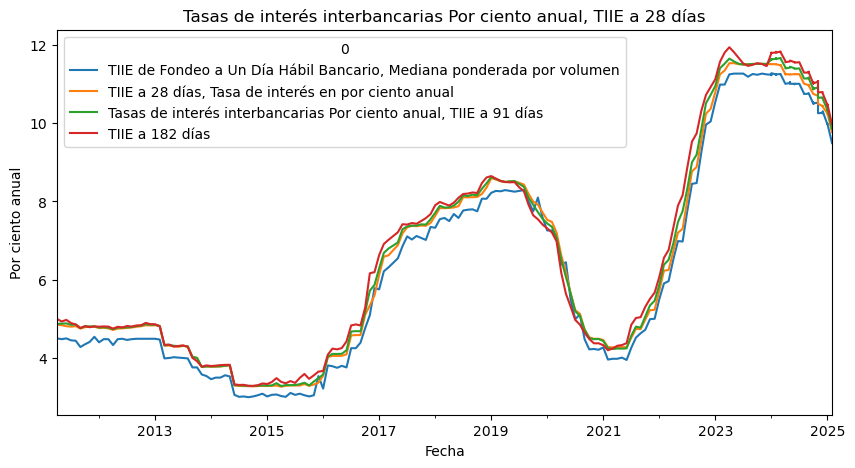

In [157]:
# Convert relevant columns to numeric data types
df1 = df1.apply(pd.to_numeric, errors='coerce')

# graficamos a ver que tal
df1.plot(figsize=(10, 5), title="Tasas de interés interbancarias Por ciento anual, TIIE a 28 días", ylabel="Por ciento anual")

In [ ]:
# era suficiente con la primera columna, entonces solo nos quedamos con ella

tiie = df1.iloc[:, 0:1]
tiie.head(30)

# lo voy a repetir

,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen"
Fecha,
2011-04,4.51
2011-05,4.49
2011-06,4.51
2011-07,4.46
2011-08,4.45
2011-09,4.29
2011-10,4.36
2011-11,4.42
2011-12,4.55


In [144]:
df2.head()

,Título,"Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H",...,"Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), O","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), P","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), Q","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), R","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), Z","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), W","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), AD","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), AF","Sistemas de pago de bajo valor, Tarjetas de débito, Tarjetas utilizadas durante el trimestre","Sistemas de pago de bajo valor, Tarjetas de débito, Cuentas con tarjetas"
0,2006-01-01 00:00:00,19194516,2888159,16828,5184010,4342957,3344859,1445254,7463,32013,...,0,2690,0,0,0,0,0,0,22479571,20354949
1,2006-04-01 00:00:00,21042559,3278850,16779,5267092,4595294,3863157,1889587,7821,34769,...,0,2922,0,0,0,0,0,0,23143881,21052656
2,2006-07-01 00:00:00,23045079,3572291,16668,5652088,4940651,4311374,2111096,8243,38985,...,0,3132,0,0,0,0,0,0,23649992,22205999
3,2006-10-01 00:00:00,24552482,3902273,16420,5701202,5103822,4672691,2432677,14619,49114,...,0,3359,0,0,0,0,0,0,24543746,22714814
4,2007-01-01 00:00:00,25732459,4144985,17879,5949267,5319045,4793506,2800621,15094,70788,...,0,3593,0,0,0,0,0,0,24888231,23771335


In [145]:
df3.head()  

,Título,"TIIE de fondeo a 1 día, Tasa de interés promedio mensual, en por ciento anual","TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual","TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual","TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual","TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual","Tasas Mexibor a 1 mes, Tasa promedio mensual Por ciento anual","Tasa Mexibor a 3 meses, Tasa de interés promedio mensual, en por ciento anual","Tasa Mexibor a 6 meses, Tasa de interés promedio mensual, en por ciento anual","Tasa Mexibor a 9 meses, Tasa de interés promedio mensual, en por ciento anual","Tasa Mexibor a 1 año, Tasa de interés promedio mensual, en por ciento anual","Fondeo promedio ponderado bancario, Tasa de interés promedio mensual, en por ciento anual","Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual","Pagaré Bancario Bursátil a 28 días, Tasa de rendimiento en promedio ponderado, en por ciento anual"
0,1988-01-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,0
1,1988-02-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,0
2,1988-03-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,0
3,1988-04-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,62.33
4,1988-05-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,53.73


In [146]:
df4.head()

,Título,"Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito","Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito","Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito"
0,2011-03-01 00:00:00,25.0942,30.3445,37.6358
1,2011-05-01 00:00:00,24.9821,30.3204,37.7136
2,2011-07-01 00:00:00,24.8008,30.2965,37.7225
3,2011-09-01 00:00:00,25.2722,30.5503,37.8129
4,2011-11-01 00:00:00,24.522,30.3803,37.8729


In [147]:
df5.head()

,Título,"Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual","Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual","Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual","Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual","Costo porcentual promedio (CPP), Tasa en por ciento anual","Costo de captaciÃ³n a plazo de pasivos estables (CPPE), Tasa en por ciento anual","Tasa de interés de los pasivos a plazo, Moneda nacional, Banca de Desarrollo"
0,1975-08-01 00:00:00,N/E,N/E,N/E,N/E,11.91,N/E,N/E
1,1975-09-01 00:00:00,N/E,N/E,N/E,N/E,11.91,N/E,N/E
2,1975-10-01 00:00:00,N/E,N/E,N/E,N/E,11.91,N/E,N/E
3,1975-11-01 00:00:00,N/E,N/E,N/E,N/E,11.92,N/E,N/E
4,1975-12-01 00:00:00,N/E,N/E,N/E,N/E,11.97,N/E,N/E


In [148]:
df6.head()

,Título,"Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes","Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes","Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes"
0,2002-01-04 00:00:00,9.4,9.4,N/E
1,2002-01-11 00:00:00,7.54,7.54,N/E
2,2002-01-18 00:00:00,7.76,7.76,N/E
3,2002-01-25 00:00:00,7.49,7.49,N/E
4,2002-02-01 00:00:00,8.88,8.88,N/E


In [149]:
df7.head()

,Título,"Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual",Tasa de fondeo ponderada con BPAS y BREMS.,"Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual","Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual"
0,2019-01-02 00:00:00,8.31,8.31,N/E,N/E
1,2019-01-03 00:00:00,8.28,8.27,N/E,N/E
2,2019-01-04 00:00:00,8.24,8.24,N/E,N/E
3,2019-01-07 00:00:00,8.26,8.26,N/E,N/E
4,2019-01-08 00:00:00,8.26,8.25,N/E,N/E


In [150]:
df8.head()

,Título,"Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio","Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio","Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento","Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio","Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio","Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento","Vector de precios de títulos gubernamentales, Cetes 182 días - Plazo",...,"Vector de precios de títulos gubernamentales, Brems 1 Año - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 1 Año - Cupón Vigente","Vector de precios de títulos gubernamentales, Brems 3 Años - Plazo","Vector de precios de títulos gubernamentales, Brems 3 Años - Precio Limpio","Vector de precios de títulos gubernamentales, Brems 3 Años - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 3 Años - Cupón Vigente","Vector de precios de títulos gubernamentales, Brems 5 Años - Plazo","Vector de precios de títulos gubernamentales, Brems 5 Años - Precio Limpio","Vector de precios de títulos gubernamentales, Brems 5 Años - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 5 Años - Cupón Vigente"
0,2003-05-16 00:00:00,27,9.95665,9.95665,5.805165,90,9.85075,9.85075,6.060452,181,...,99.738241,5.01,1077,98.73447,98.972248,5.27,N/E,N/E,N/E,N/E
1,2003-05-19 00:00:00,24,9.961733,9.961733,5.7621,87,9.848233,9.848233,6.376792,178,...,99.783577,5.01,1074,98.735,99.019472,5.27,N/E,N/E,N/E,N/E
2,2003-05-20 00:00:00,23,9.965181,9.965181,5.468973,86,9.863117,9.863117,5.809508,177,...,99.83144,5.01,1073,98.77321,99.07321,5.27,N/E,N/E,N/E,N/E
3,2003-05-21 00:00:00,22,9.968039,9.968039,5.246751,85,9.866597,9.866597,5.726401,176,...,99.83534,5.01,1072,98.75039,99.065973,5.27,N/E,N/E,N/E,N/E
4,2003-05-22 00:00:00,28,9.960956,9.960956,5.03962,91,9.859708,9.859708,5.628983,175,...,99.87124,5.01,1071,98.77293,99.10293,5.27,N/E,N/E,N/E,N/E


In [151]:
df9.head()

,Título,"Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente","Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Mercancías no Alimenticias","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Vivienda","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Educación (colegiaturas)","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Otros Servicios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios, Frutas y Verduras","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios, Pecuarios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno, Energéticos","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno, Tarifas Autorizadas por el Gobierno"
0,1988-01-01 00:00:00,4.63698,4.986074,4.63698,4.986074,5.830807,3.947648,7.96253,3.644254,2.816133,1.69691,4.433992,3.675147,4.150617,2.940669,4.966676,3.300657,3.171245,3.514403
1,1988-01-16 00:00:00,4.799512,5.185715,4.799512,5.185715,6.110194,4.199038,8.248156,3.725927,2.892723,1.728968,4.526439,3.748086,4.281287,2.95347,5.179645,3.321931,3.171245,3.577675
2,1988-02-01 00:00:00,5.041704,5.517372,5.041704,5.517372,6.561276,4.461064,8.930986,3.879873,3.006278,1.850041,4.710643,3.780023,4.317984,2.938825,5.252396,3.350038,3.171245,3.661274
3,1988-02-16 00:00:00,5.181865,5.7114,5.181865,5.7114,6.771719,4.583355,9.249473,4.044708,3.186755,1.896058,4.884811,3.793793,4.342382,2.875713,5.338639,3.354301,3.171248,3.673948
4,1988-03-01 00:00:00,5.332375,5.910858,5.332375,5.910858,7.008879,4.699212,9.642232,4.185019,3.382893,1.904372,5.012725,3.828572,4.413062,2.954738,5.402675,3.356776,3.169,3.685776


In [152]:
df10.head() # la inflacion quincenal no nos va a servir

,Título,"Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Anual"
0,2022-01-01 00:00:00,7.13,6.11
1,2022-01-16 00:00:00,7.01,6.3
2,2022-02-01 00:00:00,7.22,6.52
3,2022-02-16 00:00:00,7.34,6.67
4,2022-03-01 00:00:00,7.29,6.68


In [153]:
df11.head()

,Título,TIIE a 182 días,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual","Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",Tasa objetivo
0,2008-01-02 00:00:00,N/E,7.53,7.51,7.46,7.93,N/E,N/E
1,2008-01-03 00:00:00,N/E,7.53,7.51,7.45,7.9362,8.01,N/E
2,2008-01-04 00:00:00,N/E,7.53,7.51,7.43,7.9312,N/E,N/E
3,2008-01-07 00:00:00,N/E,7.52,7.51,7.43,7.9275,N/E,N/E
4,2008-01-08 00:00:00,N/E,7.51,7.5,7.41,7.9262,N/E,N/E


In [154]:
df12.head()

,Título,"Índice Nacional de Precios al consumidor, Variación mensual","Índice Nacional de Precios al consumidor, Variación acumulada","Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acumulada en el año","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), Mensual","Inflación, No subyacente (nueva definición), Acumulada en el año","Inflación, No subyacente (nueva definición), Anual"
0,1969-01-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
1,1969-02-01 00:00:00,0.36,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
2,1969-03-01 00:00:00,0.1,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
3,1969-04-01 00:00:00,0.27,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
4,1969-05-01 00:00:00,0,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
